The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


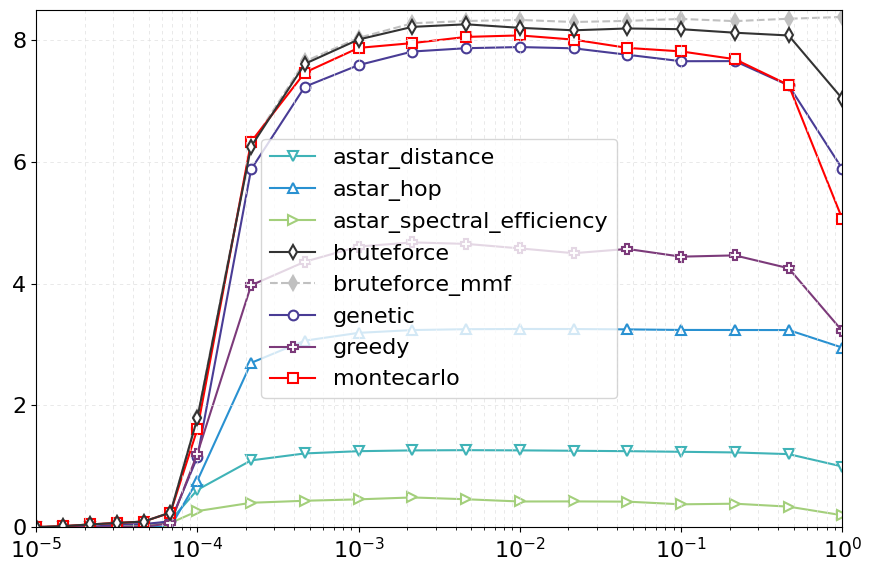

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Set global font sizes
fontsize = 16
plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize

# Predefined marker and color lists
marker_list = ['v', '^', '>', 'd', 'd', 'o', 'P', 's']
color_list = ["#3FB3B7", "#2991D1", "#A3CF7B", "#333333", "silver", "#493C95", "#7C3A7A", "#FF0000"]

# Example base directory
base_dir = "/fast/hslyu/mmf_result_1"
json_file = os.path.join(base_dir, "avg_secrecy_rate_results.json")

# 1) Load JSON results
with open(json_file, 'r') as f:
    avg_secrecy_results = json.load(f)

# 2) Extract threshold strings and convert to float
# Define thresholds from logspace
raw_logspace = np.concatenate(
    (np.logspace(-5, -4, 7, base=10)[:-1], np.logspace(-4, 0, 13, base=10))
)
thresholds = 1 - raw_logspace  # Same as in main_experiment()

# 4) Identify all schemes in the JSON data (optional if you already know them)
all_schemes = set()
for th in thresholds:
    for scheme in avg_secrecy_results[f"{th:.6f}"].keys():
        all_schemes.add(scheme)
all_schemes = sorted(list(all_schemes))

# 5) Plot
plt.figure(figsize=(9, 6))

# Loop schemes and plot lines
for i, scheme in enumerate(all_schemes):
    # Collect Y values for each threshold in ascending order
    yvals = []
    for th_str in map(lambda x: f"{x:.6f}", thresholds):
        val = avg_secrecy_results[th_str].get(scheme, None)
        # If the value is None, make it np.nan
        yvals.append(val if val is not None else np.nan)

    yvals = np.array(yvals) / 1000.0

    if scheme == "bruteforce":
        zorder=2
    else:
        zorder=1

    # Plot this scheme's line
    plt.plot(raw_logspace,
             yvals,
             linewidth=1.5,
             linestyle='-' if scheme != "bruteforce_mmf" else '--',
             marker=marker_list[i % len(marker_list)],
             markersize=7,
             markerfacecolor='w' if scheme != "bruteforce_mmf" else "silver",
             markeredgewidth=1.5,
             color=color_list[i % len(color_list)],
             label=scheme,
             zorder=zorder)

# Set x-axis to log scale
plt.xlim(raw_logspace[0], raw_logspace[-1])
plt.xscale("log")
# Example y-range and ticks (modify as needed)
plt.ylim(0, 8.5)
plt.yticks(np.arange(0, 8.5, 2))

# Enable grid
plt.grid(True, which='both', linestyle=(0, (5, 5)), linewidth=0.5, color="#e0e0e0")
plt.legend()

plt.tight_layout()
plt.savefig("mmsr_vs_spsc.eps", format='eps', dpi=300, bbox_inches='tight')
plt.show()

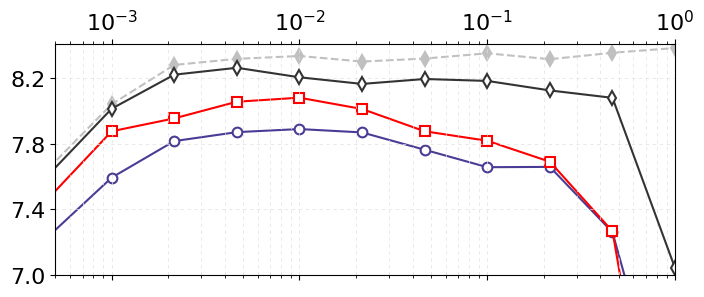

In [100]:
# 5) Plot with regression lines (in linear space)
plt.figure(figsize=(8, 3))

# X축을 로그 공간으로 변환
raw_logspace = np.logspace(-4, 0, 13, base=10)[2:]
thresholds = 1 - raw_logspace  
x_vals = raw_logspace  # 회귀는 선형 공간에서 수행

for i, scheme in enumerate(all_schemes):
    # Collect Y values for each threshold in ascending order
    yvals = []
    for th_str in map(lambda x: f"{x:.6f}", thresholds):
        val = avg_secrecy_results[th_str].get(scheme, None)
        yvals.append(val if val is not None else np.nan)

    yvals = np.array(yvals) / 1000.0  # Convert to Kbps
    zorder = 2 if scheme == "bruteforce" else 1

    # 산점도 마커
    plt.plot(x_vals,
             yvals,
             linestyle='-' if scheme != "bruteforce_mmf" else '--',
             marker=marker_list[i % len(marker_list)],
             markersize=7,
             markerfacecolor='w' if scheme != "bruteforce_mmf" else "silver",
             markeredgewidth=1.5,
             color=color_list[i % len(color_list)],
             label=scheme,
             zorder=zorder)

    # # 회귀선 (선형 공간에서 2차 다항 회귀)
    # valid_idx = ~np.isnan(yvals)
    # if np.sum(valid_idx) >= 3:
    #     deg = 1 if scheme == "bruteforce_mmf" else 3
    #     coeffs = np.polyfit(x_vals[valid_idx], yvals[valid_idx], deg=deg)
    #     poly = np.poly1d(coeffs)
    #     x_dense = np.linspace(x_vals[valid_idx].min(), x_vals[valid_idx].max(), 200)
    #     y_fit = poly(x_dense)

    #     plt.plot(x_dense,
    #              y_fit,
    #              linestyle="-",
    #              linewidth=1.5,
    #              color=color_list[i % len(color_list)],
    #              alpha=0.7,
    #              zorder=0)

# Set x-axis to log scale
plt.xlim(5e-4, 1e-0)
plt.xscale("log")
plt.xticks()
plt.tick_params(axis='x', which='both', top=True, bottom=True, labeltop=True, labelbottom=False)

plt.ylim(7.0, 8.41)
plt.yticks(np.arange(7, 8.4, 0.4))

plt.grid(True, which='both', linestyle=(0, (5, 5)), linewidth=0.5, color="#e0e0e0")
plt.savefig("mmsr_vs_spsc_mag.eps", format='eps', dpi=300, bbox_inches='tight')
plt.show()